<a href="https://colab.research.google.com/github/Nelly-CZ/Developed-works/blob/main/MODELO%20DE%20PREDICCI%C3%93N%20CON%20MACHINE%20LEARNING%20Y%20PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODELO DE MACHINE LEARNING PARA PREDECIR EL USO DE SHISHA EN EL PAÍS DE NIGERIA, USANDO FACTORES SOCIODEMOGRÁFICOS Y EMOCIONALES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
data=pd.read_csv("predictionData.csv")

In [ ]:
caseID=pd.read_csv("caseID.csv")

In [ ]:
dataPred = pd.concat([data,caseID],axis = 1)

In [ ]:
dataPred.describe()

,resp_age,shisha_age,caseid
count,1278.000000,673.000000,1.278000e+03
mean,32.466354,22.818722,6.752279e+08
std,9.804113,5.789446,3.872246e+09
min,18.000000,2.000000,1.011520e+05
25%,25.000000,19.000000,1.904052e+06
50%,30.000000,22.000000,3.706459e+06
75%,37.000000,26.000000,5.018858e+06
max,91.000000,60.000000,3.506371e+10


Text(0.5, 1.0, 'Vista general')

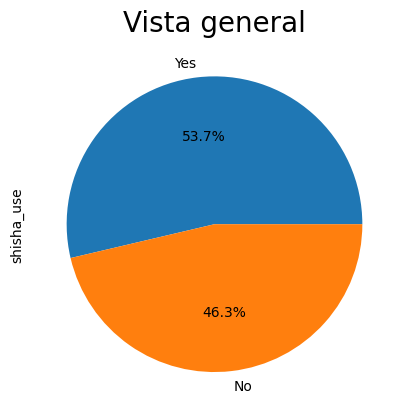

In [ ]:
dataPred.shisha_use.value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Vista general", fontsize =20)

Text(0, 0.5, 'Cantidad')

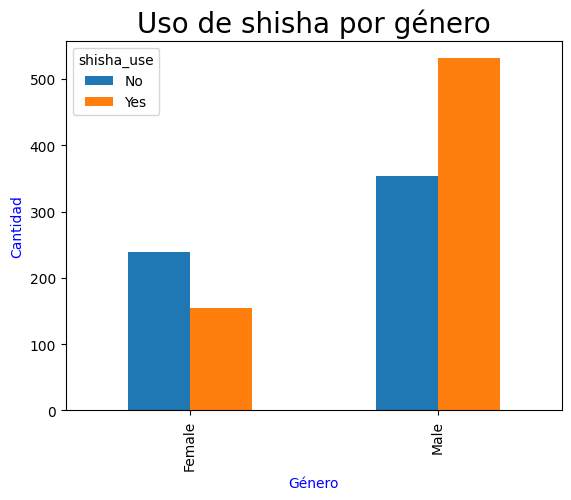

In [ ]:
fig1 = dataPred.groupby(['shisha_use','resp_gender']).count()['caseid']
fig1.unstack(level=0).plot.bar()
plt.title('Uso de shisha por género', fontsize = 20)
plt.xlabel('Género', fontsize = 10, color='blue')
plt.ylabel('Cantidad', fontsize = 10, color='blue')

Text(0, 0.5, 'Cantidad')

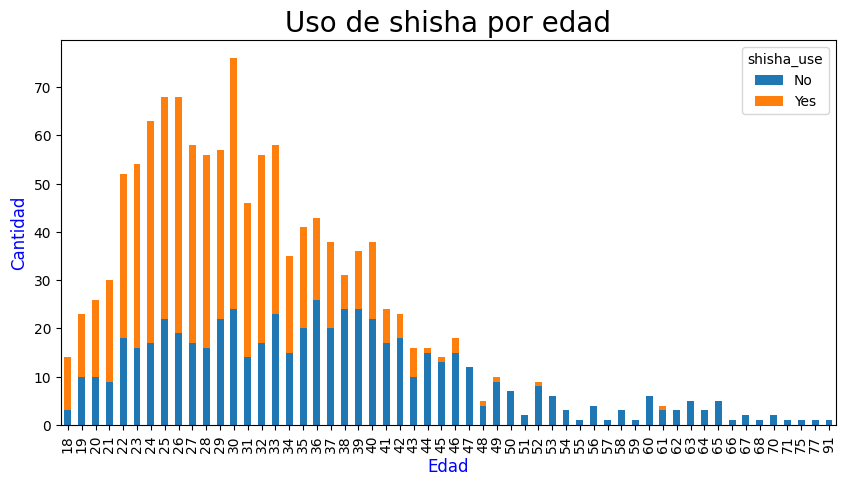

In [ ]:
fig2 = dataPred.groupby(['shisha_use','resp_age']).count()['caseid']
fig2.unstack(level=0).plot.bar(width=0.5, figsize=(10,5), stacked=True)
plt.title('Uso de shisha por edad', fontsize = 20)
plt.xlabel('Edad', fontsize = 12, color='blue')
plt.ylabel('Cantidad', fontsize = 12, color='blue')

In [ ]:
# Rename education levels
def nStudy(x):
  if x=='Non Formal Schooling':
    return 'NFS'
  if x=='Pre-Primary School completed':
    return 'PPSC'
  if x=='Less Than Primary School Completed':
    return 'LPSC'
  if x=='Primary School Completed':
    return 'PSC'
  if x=='Junior Secondary School Completed':
    return 'JSSC'
  if x=='Senior Secondary School Completed':
    return 'SSSC'
  if x=='Less than College/HND/University Degree Completed (NCE- ND- Technical )':
    return 'LUDC'
  if x=='College/HND/University Degree Completed':
    return 'UDC'
  else: return 'PGDC'

dataPred['resp_education'] = dataPred['resp_education'].apply(lambda x: nStudy(x))

Text(0, 0.5, 'Nivel de educación')

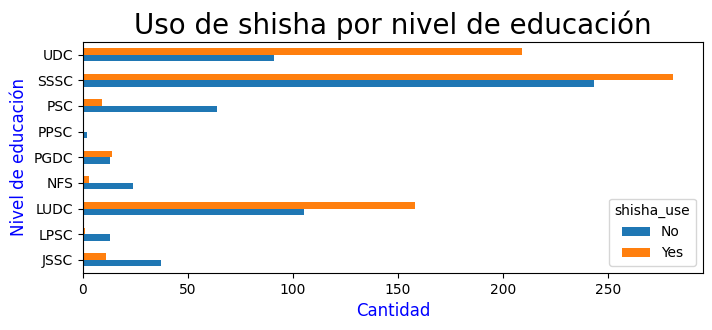

In [ ]:
fig3 = dataPred.groupby(['shisha_use','resp_education']).count()['caseid']
fig3.unstack(level=0).plot.barh(width=0.5, figsize=(8,3))
plt.title('Uso de shisha por nivel de educación', fontsize = 20)
plt.xlabel('Cantidad', fontsize = 12, color='blue')
plt.ylabel('Nivel de educación', fontsize = 12, color='blue')

Text(0, 0.5, 'Área de vivienda')

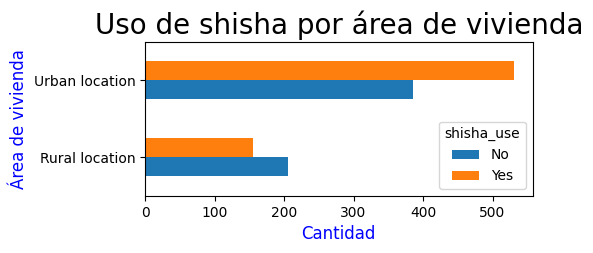

In [ ]:
fig4 = dataPred.groupby(['shisha_use','resp_location']).count()['caseid']
fig4.unstack(level=0).plot.barh(width=0.5, figsize=(5,2))
plt.title('Uso de shisha por área de vivienda', fontsize = 20)
plt.xlabel('Cantidad', fontsize = 12, color='blue')
plt.ylabel('Área de vivienda', fontsize = 12, color='blue')

Text(0, 0.5, 'Tipo de empleo')

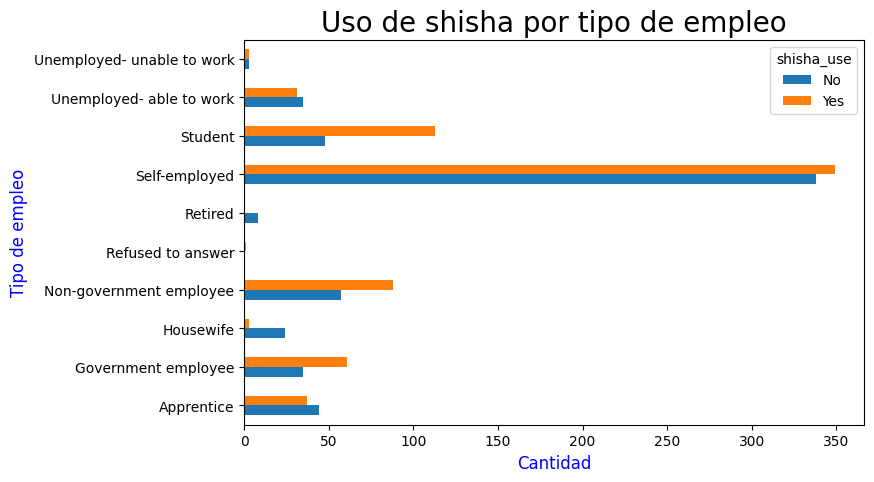

In [ ]:
fig5 = dataPred.groupby(['shisha_use','resp_work']).count()['caseid']
fig5.unstack(level=0).plot.barh(width=0.5, figsize=(8,5))
plt.title('Uso de shisha por tipo de empleo', fontsize = 20)
plt.xlabel('Cantidad', fontsize = 12, color='blue')
plt.ylabel('Tipo de empleo', fontsize = 12, color='blue')

Text(0, 0.5, 'Consumo de alcohol')

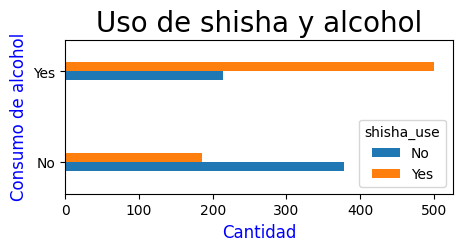

In [ ]:
fig6 = dataPred.groupby(['shisha_use','alcohol_use']).count()['caseid']
fig6.unstack(level=0).plot.barh(width=0.2, figsize=(5,2))
plt.title('Uso de shisha y alcohol', fontsize = 20)
plt.xlabel('Cantidad', fontsize = 12, color='blue')
plt.ylabel('Consumo de alcohol', fontsize = 12, color='blue')

Text(0, 0.5, 'Consumo de cigarro')

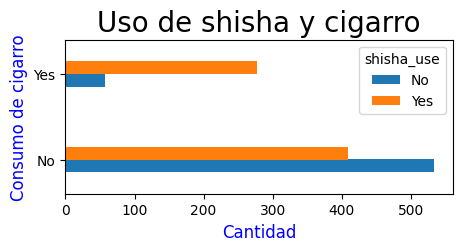

In [ ]:
fig7 = dataPred.groupby(['shisha_use','ciga_use']).count()['caseid']
fig7.unstack(level=0).plot.barh(width=0.3, figsize=(5,2))
plt.title('Uso de shisha y cigarro', fontsize = 20)
plt.xlabel('Cantidad', fontsize = 12, color='blue')
plt.ylabel('Consumo de cigarro', fontsize = 12, color='blue')

Text(0, 0.5, 'Nivel de depresión')

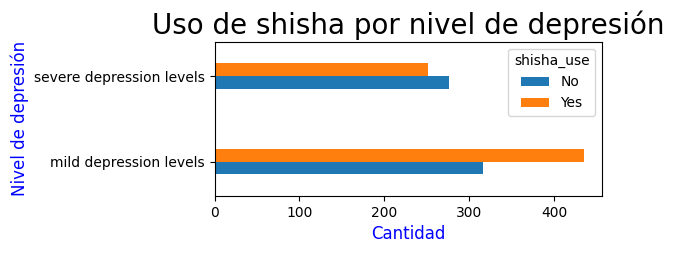

In [ ]:
fig8 = dataPred.groupby(['shisha_use','phq_level']).count()['caseid']
fig8.unstack(level=0).plot.barh(width=0.3, figsize=(5,2))
plt.title('Uso de shisha por nivel de depresión', fontsize = 20)
plt.xlabel('Cantidad', fontsize = 12, color='blue')
plt.ylabel('Nivel de depresión', fontsize = 12, color='blue')

Text(0, 0.5, 'Nivel de ansiedad')

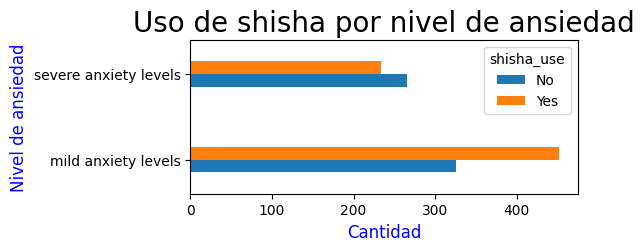

In [ ]:
fig9 = dataPred.groupby(['shisha_use','gad_level']).count()['caseid']
fig9.unstack(level=0).plot.barh(width=0.3, figsize=(5,2))
plt.title('Uso de shisha por nivel de ansiedad', fontsize = 20)
plt.xlabel('Cantidad', fontsize = 12, color='blue')
plt.ylabel('Nivel de ansiedad', fontsize = 12, color='blue')

Text(0, 0.5, 'Uso de shisha en el hogar')

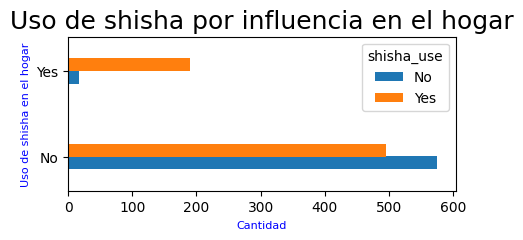

In [ ]:
fig10 = dataPred.groupby(['shisha_use','hh_shisha_use']).count()['caseid']
fig10.unstack(level=0).plot.barh(width=0.3, figsize=(5,2))
plt.title('Uso de shisha por influencia en el hogar', fontsize = 18)
plt.xlabel('Cantidad', fontsize = 8, color='blue')
plt.ylabel('Uso de shisha en el hogar', fontsize = 8, color='blue')

In [ ]:
def rename(x):
  if x == "No":
    return 0
  else:
    return 1
dataPred['shisha_use'] = dataPred['shisha_use'].apply(lambda x: rename(x)).astype(int)

In [ ]:
dataPred = dataPred.drop(['zone', 'date', 'resp_age', 'resp_gender', 'resp_ethnicity', 'resp_ethnicity_other',
                          'resp_religion', 'shisha_age', 'know_ciga', 'know_shisha', 'know_ciga_bother',
                          'know_shisha_bother', 'shisha_ever_use', 'current_shisha_use', 'caseid'], axis=1)

In [ ]:
dataPred.loc[960]

shisha_use                             1
resp_location             Urban location
resp_education                      SSSC
resp_work                  Self-employed
ciga_use                              No
alcohol_use                          Yes
hh_shisha_use                         No
phq_level         mild depression levels
gad_level            mild anxiety levels
Name: 960, dtype: object

In [ ]:
dataPred.loc[50]

shisha_use                               0
resp_location               Urban location
resp_education                        SSSC
resp_work                       Apprentice
ciga_use                                No
alcohol_use                             No
hh_shisha_use                           No
phq_level         severe depression levels
gad_level            severe anxiety levels
Name: 50, dtype: object

TRANSFORMACIÓN DE DATOS

In [ ]:
#Conversión de datos de tipo cualitativo a cuantitativo
dataPred['resp_location']= dataPred['resp_location'].astype('category')
dataPred['resp_education']= dataPred['resp_education'].astype('category')
dataPred['resp_work']= dataPred['resp_work'].astype('category')
dataPred['ciga_use']= dataPred['ciga_use'].astype('category')
dataPred['alcohol_use']= dataPred['alcohol_use'].astype('category')
dataPred['phq_level']= dataPred['phq_level'].astype('category')
dataPred['gad_level']= dataPred['gad_level'].astype('category')
dataPred['hh_shisha_use']= dataPred['hh_shisha_use'].astype('category')

#Creación de dummies
dataPred = pd.get_dummies(dataPred, columns = ['resp_location'])
dataPred = pd.get_dummies(dataPred, columns = ['resp_education'])
dataPred = pd.get_dummies(dataPred, columns = ['resp_work'])
dataPred = pd.get_dummies(dataPred, columns = ['ciga_use'])
dataPred = pd.get_dummies(dataPred, columns = ['alcohol_use'])
dataPred = pd.get_dummies(dataPred, columns = ['phq_level'])
dataPred = pd.get_dummies(dataPred, columns = ['gad_level'])
dataPred = pd.get_dummies(dataPred, columns = ['hh_shisha_use'])

In [ ]:
dataPred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   shisha_use                            1278 non-null   int64
 1   resp_location_Rural location          1278 non-null   uint8
 2   resp_location_Urban location          1278 non-null   uint8
 3   resp_education_JSSC                   1278 non-null   uint8
 4   resp_education_LPSC                   1278 non-null   uint8
 5   resp_education_LUDC                   1278 non-null   uint8
 6   resp_education_NFS                    1278 non-null   uint8
 7   resp_education_PGDC                   1278 non-null   uint8
 8   resp_education_PPSC                   1278 non-null   uint8
 9   resp_education_PSC                    1278 non-null   uint8
 10  resp_education_SSSC                   1278 non-null   uint8
 11  resp_education_UDC                    1278 

MODELADO

In [ ]:
#Separación de datos para el modelo
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = dataPred.drop('shisha_use',axis=1).to_numpy().astype(float)
Y = dataPred['shisha_use']
Y = LabelEncoder().fit_transform(Y).astype(float)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42, shuffle=True)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((894, 31), (384, 31), (894,), (384,))

In [ ]:
### REGRESIÓN LOGÍSTICA SIN CROSS VALIDACIÓN
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, Y_train)
acc_log_train = round(model_logistic.score(X_train, Y_train)*100,2)
acc_log_test = round(model_logistic.score(X_test, Y_test)*100,2)
print('Precisión: {} %'.format(acc_log_train))

Precisión: 78.08 %


In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
probs = model_logistic.predict_proba(X_test)
prob = probs[:,1]
prob_df=pd.DataFrame(prob)
threshold = 0.15
prob_df['prediccion']=np.where(prob_df[0]>threshold,1,0)
prob_df['actual'] =np.array(Y_test)
confusion_matrix = pd.crosstab(prob_df.prediccion,prob_df.actual)
confusion_matrix

actual,0.0,1.0
prediccion,,
0,41,5
1,140,198


In [ ]:
#REGRESIÓN LOGÍSTICA CON CROSS VALIDACIÓN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k_fold= KFold(n_splits = 10, shuffle=True, random_state=42)
val_cruz = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000),X,
                           Y, scoring='accuracy', cv=k_fold)
print(f'Precisión: {val_cruz.mean()*100.0:,.2f}% ({val_cruz.std()*100.0:,.2f}%)')

Precisión: 76.84% (4.73%)


In [ ]:
# K Vecinos cercanos
from sklearn.neighbors import KNeighborsClassifier
model_neigh = KNeighborsClassifier()
model_neigh.fit(X_train, Y_train)
print('Precisión: {} %'.format(round(model_neigh.score(X_train, Y_train)*100,2)))

Precisión: 78.97 %


In [ ]:
# k vecinos cercanos con cross validation
val_cruz_kn = cross_val_score(KNeighborsClassifier(),X,
                           Y, scoring='accuracy', cv=k_fold)
print(f'Precisión: {val_cruz_kn.mean()*100.0:,.2f}%')

Precisión: 66.43%


In [ ]:
# Máquina de vector de soporte
from sklearn.svm import SVC
model_svc = SVC(probability=True)
model_svc.fit(X_train, Y_train)
print('Precisión: {} %'.format(round(model_svc.score(X_train, Y_train)*100,2)))

Precisión: 78.52 %


In [ ]:
# Máquina de vector de soporte con cross validation
val_cruz_svc = cross_val_score(SVC(),X,
                           Y, scoring='accuracy', cv=k_fold)
print(f'Precisión: {val_cruz_svc.mean()*100.0:,.2f}%')

Precisión: 75.67%


In [ ]:
# Árbol de decisión
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, Y_train)
print('Precisión: {} %'.format(round(model_tree.score(X_train, Y_train)*100,2)))

Precisión: 84.68 %


In [ ]:
# Árbol de decisión con cross validation
val_cruz_tree = cross_val_score(DecisionTreeClassifier(),X,
                           Y, scoring='accuracy', cv=k_fold)
print(f'Precisión: {val_cruz_tree.mean()*100.0:,.2f}%')

Precisión: 67.29%


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, Y_train)
print('Precisión: {} %'.format(round(model_naive.score(X_train, Y_train)*100,2)))

Precisión: 59.06 %


In [ ]:
# Naive Bayes con cross validation
val_cruz_naive = cross_val_score(GaussianNB(),X,
                           Y, scoring='accuracy', cv=k_fold)
print(f'Precisión: {val_cruz_naive.mean()*100.0:,.2f}%')

Precisión: 65.42%


In [ ]:
#PRUEBA DEL MODELO DE PREDICCIÓN CON LOGISTIC REGRESSION
value_to_predict = X[960]
result=model_logistic.predict([value_to_predict])
if result[0]==1:
  print('{} : Posible caso uso de shisha'.format(result[0]))
else:
  print('{} : Posible caso NO uso de shisha'.format(result[0]))

1.0 : Posible caso uso de shisha


In [ ]:
#PRUEBA DEL MODELO DE PREDICCIÓN CON LOGISTIC REGRESSION
value_to_predict = X[50]
result=model_logistic.predict([value_to_predict])
if result[0]==1:
  print('{} : Posible caso uso de shisha'.format(result[0]))
else:
  print('{} : Posible caso NO uso de shisha'.format(result[0]))

0.0 : Posible caso NO uso de shisha
